<a href="https://colab.research.google.com/github/pdenailly/Atelier_bikes/blob/main/ACTIVITE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANALYSE DE BASES DE DONNEES A L'AIDE DE STATISTIQUES SIMPLES**

Application : Etude des volumes de cyclistes dans la ville de Paris en amont, pendant et après les JO 2024.


Bienvenu dans cet atelier ! Nous allons y explorer quelques manières simples d'étudier un jeux de données avant toute utilisation pour des travaux de modélisation.

Pour ce cas pratique nous nous intéresserons à des séries temporelles de traffic de vélo, comptés à chaque heure entre juin et septembre 2024 en plusieurs points de la ville de Paris. Ces données ont été extraites d'une [base ouverte mise à disposition par la ville de Paris](https://parisdata.opendatasoft.com/explore/dataset/comptage-velo-donnees-compteurs/api/?disjunctive.id_compteur&disjunctive.nom_compteur&disjunctive.id&disjunctive.name&q.timerange.date=date:%5B2024-05-31T22:00:00Z+TO+2024-09-13T21:59:59Z%5D&basemap=jawg.dark&location=13,48.85652,2.35024&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQVZHIiwieUF4aXMiOiJzdW1fY291bnRzIiwic2NpZW50aWZpY0Rpc3BsYXkiOnRydWUsImNvbG9yIjoiI0ZBOEM0NCJ9XSwieEF4aXMiOiJkYXRlIiwibWF4cG9pbnRzIjoiIiwidGltZXNjYWxlIjoibW9udGgiLCJzb3J0IjoiIiwiY29uZmlnIjp7ImRhdGFzZXQiOiJjb21wdGFnZS12ZWxvLWRvbm5lZXMtY29tcHRldXJzIiwib3B0aW9ucyI6eyJkaXNqdW5jdGl2ZS5pZF9jb21wdGV1ciI6dHJ1ZSwiZGlzanVuY3RpdmUubm9tX2NvbXB0ZXVyIjp0cnVlLCJkaXNqdW5jdGl2ZS5pZCI6dHJ1ZSwiZGlzanVuY3RpdmUubmFtZSI6dHJ1ZSwicmVmaW5lLmRhdGUiOiIyMDI0In19fV0sImRpc3BsYXlMZWdlbmQiOnRydWUsImFsaWduTW9udGgiOnRydWUsInRpbWVzY2FsZSI6IiJ9). La période de Juillet 2024 a été marquée par la présence des Jeux Olympiques en région parisienne, l'un des mots d'ordres ayant été l'utilisation des mobilités douces, dont le vélo. A travers les différents ateliers proposés ici, nous allons nous intéresser à l'étude de ces données, et observer à quel point les jeux olympiques ont eu un impact sur le volume de cyclistes à Paris.

Assurez vous que le fichier de données *comptage-velo-donnees-compteurs.csv* soit présent dans le répertoire courant (sur colab, faites les glisser dans l'espace de stockage de la session avec le logo dossier à gauche). Ces fichiers sont disponibles sur le dépôt git de l'atelier : https://github.com/pdenailly/Atelier-Summer-School.


**Importation des librairies Python**

Nous allons travailler avec le language Python dans cet atelier. En amont de tout projet, il est toujours bon de rassembler les importations de librairies dans une section dédiée. Nous allons notamment travailler avec la librairie *pandas*, très adaptée à l'étude de bases de données sous python.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

**Importation des données de comptages de vélos**

L'importation des données se fait avec la librairie pandas, via la fonction read_csv(.).

In [2]:
#Importation des données de comptage vélos depuis le fichier .csv
bike_data = pd.read_csv('comptage-velo-donnees-compteurs.csv', sep=";", decimal='.').iloc[: , 1:]


Maintenant que les données ont été importées sous python, il s'agit de les comprendre. Pour commencer nous devons nous faire une idée du contenu de la base, ses dimensions, ses types de variables, etc.

**Etudes préliminaires sur la base de données**

Commençons par chercher le nombre de lignes et de colonnes dans cette table afin d'en étudier les dimensions. Trouvez l'attrubut "shape" sur la dataframe pour cela. Avec pandas un attribut de dataframe 'att' est visualisable via la syntaxe 'dataframe.att'.

In [3]:
bike_data.shape

(152651, 7)

Shape renvoie un objet *tuple* contenant le nombre de lignes et le nombre de colonnes. Qu'observez vous ici ?

Maintenant explorons de quelles variables (colonnes) nous disposons dans cette dataframe. Utilisez l'attribut "columns" pour cela.

In [4]:
bike_data.columns

Index(['Nom du compteur', 'Identifiant du site de comptage',
       'Nom du site de comptage', 'Comptage horaire',
       'Date et heure de comptage', 'Date d'installation du site de comptage',
       'Coordonnées géographiques'],
      dtype='object')

Cette commande nous permet d'obtenir une liste de des noms de colonnes présentes dans la dataframe. Certaines comme 'Comptage horaire', 'Date et heure de comptage' et 'Nom du compteur' semblent particulièrement intéressantes comme elles pourront situer les comptages temporellement et spatialement.

Nous ne savons en revanche pas quels sont les types des colonnes (nombres entiers, continus, chaînes de caractère,etc.). Cette étape est importante, nous voulons effectivement connaitre la nature des colonnes afin de pouvoir les traiter comme il faut dans les analyses ultérieures. Vous trouverez dans la [documentation de pandas](https://pandas.pydata.org/docs/reference/frame.html) l'attribut nécessaires pour trouver le type de chaque colonne.

In [5]:
bike_data.dtypes

,0
Nom du compteur,object
Identifiant du site de comptage,float64
Nom du site de comptage,object
Comptage horaire,float64
Date et heure de comptage,object
Date d'installation du site de comptage,object
Coordonnées géographiques,object


Le type object dans pandas est un type générique qui est utilisé pour stocker des données non numériques. En pratique, il est souvent utilisé pour représenter des chaines de caractère, ou bien des valeurs hétérogènes.

Nous observons notamment que la colonne 'Comptage horaire' est bien composée de comptages (int64). Les autres colonnes sont composées d'informations sous la forme de chaines de caractères, excepté la colonne 'Identifiant du site de comptage' qui est composée de valeurs numériques continues.

La fonction 'describe()' peut être appliquée sur une colonne du dataframe pour en décrire le contenu (nombre de valeurs, moyenne, min, max, etc.). Appliquez cette fonction à la colonne 'Comptage horaire' afin d'en étudier le contenu. Quelles sont les valeurs de moyenne ? De médiane ? Pourquoi sont elles différentes ?

In [6]:
bike_data['Comptage horaire'].describe()

,Comptage horaire
count,152650.000000
mean,86.099155
std,118.064176
min,0.000000
25%,12.000000
50%,48.000000
75%,108.000000
max,1574.000000


Appliquez maintenant la fonction de description à la colonne 'Identifiant du site de comptage'. Qu'observez vous ? Est ce cohérent pour une colonne dont la donnée est censée donner un identifiant à chaque site de comptage ?



In [7]:
bike_data['Identifiant du site de comptage'].describe()


,Identifiant du site de comptage
count,1.417580e+05
mean,1.357372e+08
std,7.657293e+07
min,1.000031e+08
25%,1.000475e+08
50%,1.000560e+08
75%,1.000573e+08
max,3.000303e+08


Modifiez la colonne 'Identifiant du site de comptage' afin d'en obtenir une variable catégorielle (chaque identifiant = une catégorie). Appliquez pour cela la fonction 'astype(...)' sur la colonne, et spécifiez que la transformation doit se faire vers des données catégorielles. Créez la colonne 'Identifiant du site de comptage cat' avec votre transformation. Ensuite appliquez la fonction de description à votre colonne modifiée 'Identifiant du site de comptage cat'. Qu'observez vous ? Combien y a t-il de sites de comptages ?

In [8]:
bike_data['Identifiant du site de comptage'] = bike_data['Identifiant du site de comptage'].astype('category')
bike_data['Identifiant du site de comptage'].describe()

,Identifiant du site de comptage
count,141758.0
unique,65.0
top,100056329.0
freq,3162.0


Un site de comptage est une zone qui peut rassembler plusieurs capteurs de comptages répartis dans la ville de Paris. Les capteurs apparaissent dans la colonne 'Nom du compteur'. Combien y a t-il de capteurs en tout ? Vous pouvez passer par l'utilisation de la fonction 'nunique()'.

In [9]:
bike_data['Nom du compteur'].nunique()


97

A ce stade, nous ne nous sommes pas intéressé à l'aspect temporel dans les données, pourtant central pour l'étude de comptages de vélos dans le temps. La colonne 'Date et heure de comptage' est composée de chaines de caractères, visualisons l'apparence de ces données.

In [15]:
bike_data['Date et heure de comptage'].head()

,Date et heure de comptage
0,2024-06-01 00:00:00+02:00
1,2024-06-01 00:00:00+02:00
2,2024-06-01 00:00:00+02:00
3,2024-06-01 00:00:00+02:00
4,2024-06-01 00:00:00+02:00


Les dates et les heures sont combinées dans des chaines au pattern suivant 'AAA-MM-JJ HH:MM:SS+02:00'. Le code suivant permet d'extraire les dates et les heures : il convertit les chaines de caractères en objets datetime, desquels il est possible d'extraire les différentes composantes de temps. Deux nouvelles colonnes 'Date' et 'Heure' sont créees.

In [13]:
#Conversion des chaines de caractère en objets datetime
bike_data['Date et heure de comptage'] = pd.to_datetime(bike_data['Date et heure de comptage'])

#Extraction date
bike_data['Date'] = bike_data['Date et heure de comptage'].dt.date

# Extraire heure
bike_data['Heure'] = bike_data['Date et heure de comptage'].dt.time

Passons maintenant à une autre étape dans l'étude de nos données : la qualité. Cette étape consiste à repérer la présence de données manquantes et d'éventuelles valeurs aberrantes.

**Qualité des données**

Nous allons nous concentrer dans cette partie sur les données de comptages en elles mêmes. Afin de vérifier la quantité de valeurs manquantes, il faut estimer le nombre de pas de temps sans comptages pour chaque capteur. Pour cela, dans un premier temps nous allons étendre la base de données. Nous allons créer une nouvelle base 'bike_data_spread'. Dans cette base, chaque 'Nom du compteur' de bike_data devient une colonne et les valeurs dans la colonne 'Comptage horaire' remplissent ces colonnes, [vous pouvez utiliser la méthode .'pivot()' de pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html?utm_source=chatgpt.com). Pensez à prendre comme index les colonnes 'Date' ET 'Heure'.

In [20]:
bike_data_spread = bike_data.pivot(index=['Date', 'Heure'], columns='Nom du compteur', values='Comptage horaire')
bike_data_spread.head()

Nom du compteur      10 avenue de la Grande Armée SE-NO  \
Date       Heure                                          
NaN        NaN                                      NaN   
2024-06-01 00:00:00                                19.0   
           01:00:00                                14.0   
           02:00:00                                22.0   
           03:00:00                                11.0   

Nom du compteur      10 boulevard Auguste Blanqui NE-SO  \
Date       Heure                                          
NaN        NaN                                      NaN   
2024-06-01 00:00:00                                11.0   
           01:00:00                                10.0   
           02:00:00                                14.0   
           03:00:00                                 8.0   

Nom du compteur      102 boulevard de Magenta SE-NO  \
Date       Heure                                      
NaN        NaN                                  NaN   
2024-06-01 00:00:00                           191.0   
           01:00:00                           144.0   
           02:00:00                           184.0   
           03:00:00                            89.0   

Nom du compteur      106 avenue Denfert Rochereau NE-SO  \
Date       Heure                                          
NaN        NaN                                      NaN   
2024-06-01 00:00:00                                 0.0   
           01:00:00                                 0.0   
           02:00:00                                 0.0   
           03:00:00                                 0.0   

Nom du compteur      129 rue Lecourbe SO-NE  132 rue Lecourbe NE-SO  \
Date       Heure                                                      
NaN        NaN                          NaN                     NaN   
2024-06-01 00:00:00                    15.0                    39.0   
           01:00:00                     5.0                    24.0   
           02:00:00                    11.0                    24.0   
           03:00:00                     4.0                    19.0   

Nom du compteur      135 avenue Daumesnil SE-NO  147 avenue d'Italie S-N  \
Date       Heure                                                           
NaN        NaN                              NaN                      NaN   
2024-06-01 00:00:00                        20.0                     23.0   
           01:00:00                        30.0                     10.0   
           02:00:00                         6.0                      6.0   
           03:00:00                         1.0                      5.0   

Nom du compteur      152 boulevard du Montparnasse E-O  \
Date       Heure                                         
NaN        NaN                                     NaN   
2024-06-01 00:00:00                               28.0   
           01:00:00                               15.0   
           02:00:00                               16.0   
           03:00:00                                6.0   

Nom du compteur      152 boulevard du Montparnasse O-E  ...  \
Date       Heure                                        ...   
NaN        NaN                                     NaN  ...   
2024-06-01 00:00:00                               15.0  ...   
           01:00:00                                8.0  ...   
           02:00:00                                8.0  ...   
           03:00:00                                7.0  ...   

Nom du compteur      Totem 64 Rue de Rivoli Totem 64 Rue de Rivoli Vélos E-O  \
Date       Heure                                                               
NaN        NaN                                                     NaN         
2024-06-01 00:00:00                                               54.0         
           01:00:00                                               56.0         
           02:00:00                                               35.0         
           0

Votre nouvelle table devrait contenir 97 colonnes, soit le nombre de capteurs, ainsi que deux index : la date et l'heure. Nous aimerions maintenant connaitre les 5 capteurs présentant le plus de valeurs manquantes. Pour cela nous allons appliquer une série de fonctions sur la base bike_data_spread. Utilisez les fonctions isna(), sum(), sort_values() et head() pour trouver ce résultat. sort_values() utilise un paramètre 'ascending' qui vous sera utile.

Aide :
Avec pandas, il est possible d'appliquer plusieurs fonctions successives à une dataframe. Par défaut ces fonctions s'appliquent aux colonnes. Par exemple si l'on souhaite appliquer deux fonctions successives à une dataframe, on peut l'écrire sous la *dataframe.fonction1().fonction2()* où fonction2() applique une fonction à une dataframe pré-transformée par fonction1().



In [28]:
bike_data_spread.isna().sum().sort_values(ascending=False).head(5)

,0
Nom du compteur,
Pont de la Concorde S-N,280
Totem 64 Rue de Rivoli Totem 64 Rue de Rivoli Vélos O-E,132
Totem 64 Rue de Rivoli Totem 64 Rue de Rivoli Vélos E-O,119
Face au 48 quai de la marne SO-NE,95
Face au 48 quai de la marne NE-SO,83


Maintenant que fait on de ces données manquantes ? Ici il n'y a pas de solution toute faite, cela dépend du cas d'étude et de la quantité de données manquantes. On peut néanmoins penser à trois solutions :


*   Dans le cas où un capteur présente une trop grande quantité de données manquantes, il devient difficile à exploiter et devrait être retiré.
*   Dans le cas où les données manquantes sont peu nombreuses, on peut soit choisir de les ignorer, soit de les corriger via des méthodes de lissage.

Dans notre cas, le capteur avec le plus de données manquantes, n'excède pas 280 manques, pour un total de 1583 pas de temps. Dans le cadre de ce TP nous conserverons les données manquantes telles quelles car elles ne présentent pas un impact important pour nos études.

Passons à un rapide examen de la présence ou non de valeurs extrêmes (outliers) dans nos données. Ces données présentent des valeurs très grandes ou très petites par rapport au reste des données et peuvent soit provenir de phénomènes explicables, soit d'erreurs d'acquisitions.
Dans le cadre d'un modèle d'apprentissage, ces données doivent être traitées, quelque soit leur origine. Si elles sont explicables, des éléments explicatifs devraient intégrer le modèle. Si elles sont le fruit d'erreurs, il faudrait les retirer ou les corriger. Une bonne manière d'étudier la distribution des valeurs dans une colonne de données, est de passer par un histogramme. Utilisez la fonction 'hist()' pour observer la distribution des données de comptages de la base 'bike_data'. [L'argument 'bins' peut vous être utile](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html).
Que représentent les abscisses ? Les ordonnées ?
D'après vous, les données présentent elles des valeurs extrèmes, inutilisables en tant que telles ?


<Axes: >

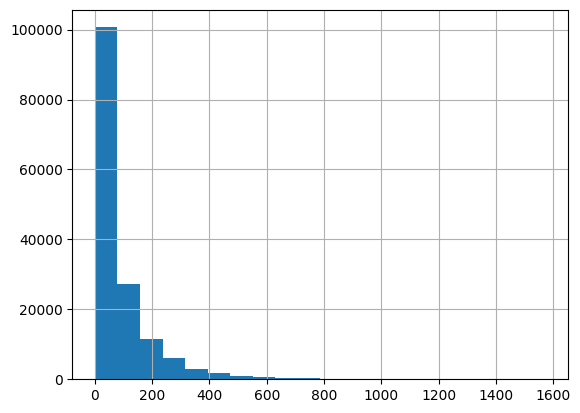

In [35]:
# Supposons que votre DataFrame s'appelle df
bike_data['Comptage horaire'].hist(bins=20)  # Vous pouvez ajuster le nombre de bins
